# Ejercicio 2 - Modelo de Hopfield

Construir patrones de letras del abecedario utilizando 1 y -1 y matrices de 5x5.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys; sys.path.append("..")
from src.Hopfield import HopfieldNetwork, show_pattern, add_noise, is_equal
from src.abecedario import abecedario_5x5

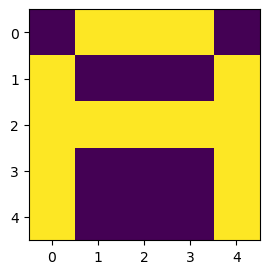

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
plt.imshow(abecedario_5x5["A"])
plt.show()

In [3]:
# entreno con 3 patrones
patrones = np.stack(
    [np.array(abecedario_5x5[letra]).flatten() for letra in "ATR"]
)
net = HopfieldNetwork()
net.train(patrones)

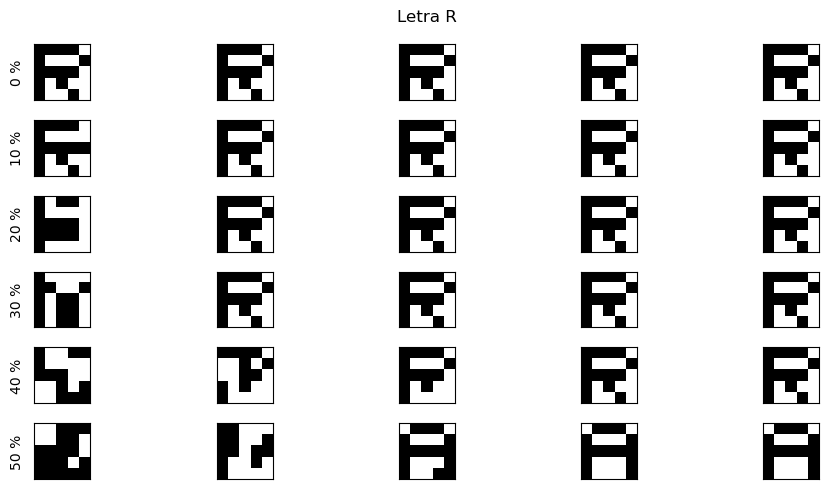

In [4]:
# pruebo diferentes patrones de ruido
letra = "R"

noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
steps = 4
fig, ax = plt.subplots(len(noise_levels), steps + 1, figsize=(10,5))

for i, noise_level in enumerate(noise_levels):
    patron = np.array(abecedario_5x5[letra]).flatten()
    noisy = add_noise(patron, noise_level)
    x, history = net.recall(noisy, steps, verbose=False)

    for j, h in enumerate(history):
        ax[i, j].imshow(1 - h.reshape(5,5), cmap="gray")
        ax[i, j].set_yticks([])
        ax[i, j].set_xticks([])
        ax[i, 0].set_ylabel("{:.0f} %".format(noise_level * 100))

plt.suptitle("Letra {}".format(letra))
plt.tight_layout()
plt.show()

Si los patrones son muy rudosos (>30 %) se observa que no se puede reconstruir totalmente el patrón.

In [5]:
# entreno con 3 patrones
patrones = np.stack(
    [np.array(abecedario_5x5[letra]).flatten() for letra in "ABCD"]
)
net = HopfieldNetwork()
net.train(patrones)

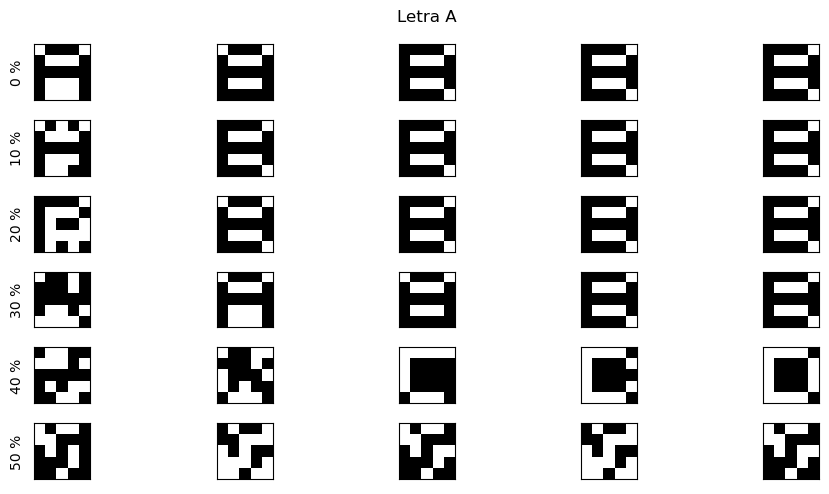

In [6]:
# pruebo diferentes patrones de ruido
letra = "A"

noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
steps = 4
fig, ax = plt.subplots(len(noise_levels), steps + 1, figsize=(10,5))

for i, noise_level in enumerate(noise_levels):
    patron = np.array(abecedario_5x5[letra]).flatten()
    noisy = add_noise(patron, noise_level)
    x, history = net.recall(noisy, steps, verbose=False)

    for j, h in enumerate(history):
        ax[i, j].imshow(1 - h.reshape(5,5), cmap="gray")
        ax[i, j].set_yticks([])
        ax[i, j].set_xticks([])
        ax[i, 0].set_ylabel("{:.0f} %".format(noise_level * 100))

plt.suptitle("Letra {}".format(letra))
plt.tight_layout()
plt.show()

A partir de tener más de 4 patrones para reconstruir se observo que la red no funciona correctamente.

La capacidad de una red de Hopefield es de:

$$C = \frac{n}{2 \cdot ln_2{n}},$$

siendo $n$ el número de neuronas.

In [7]:
# Entreno patrones similares
patrones = np.stack(
    [np.array(abecedario_5x5[letra]).flatten() for letra in "LEF"]
)
net = HopfieldNetwork()
net.train(patrones)

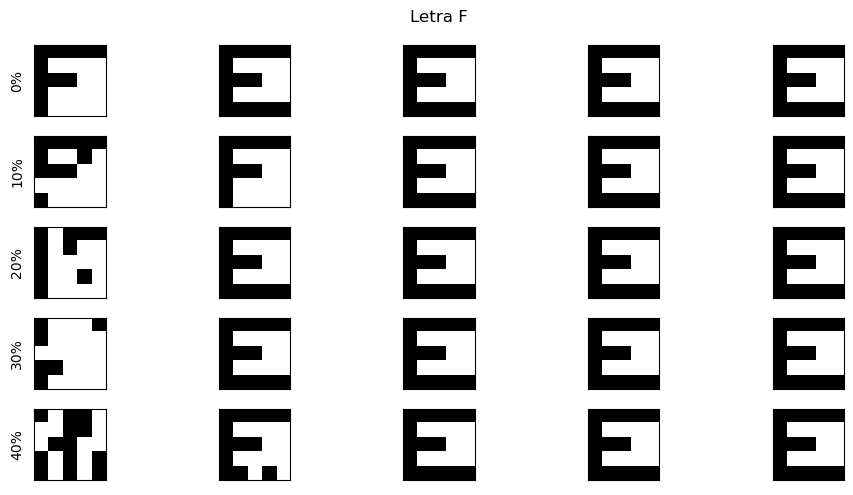

In [8]:
# pruebo diferentes patrones de ruido
letra = "F"

noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, ]
steps = 4
fig, ax = plt.subplots(len(noise_levels), steps + 1, figsize=(10,5))

for i, noise_level in enumerate(noise_levels):
    patron = np.array(abecedario_5x5[letra]).flatten()
    noisy = add_noise(patron, noise_level)
    x, history = net.recall(noisy, steps, verbose=False)

    for j, h in enumerate(history):
        ax[i, j].imshow(1 - h.reshape(5,5), cmap="gray")
        ax[i, j].set_yticks([])
        ax[i, j].set_xticks([])
        ax[i, 0].set_ylabel("{:.0f}%".format(noise_level * 100))

plt.suptitle("Letra {}".format(letra))
plt.tight_layout()
plt.show()